In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# 1. Load Data
file_path = "./Dataset/HH13.xlsx"
df = pd.read_excel(file_path)
df

,R= 147 G= 146.60 B= 103.02 71 %
0,R= 147 G= 146.60 B= 103.02 71 %
1,R= 147 G= 149.00 B= 106.40 71 %
2,R= 147 G= 146.60 B= 130.06 70 %
3,R= 147 G= 146.60 B= 130.06 70 %
4,R= 147 G= 146.60 B= 103.02 70 %
...,...
83,R= 144 G= 149.00 B= 106.40 68 %
84,R= 144 G= 149.00 B= 106.40 68 %
85,R= 144 G= 149.00 B= 106.40 68 %
86,R= 144 G= 146.60 B= 106.40 67 %


In [2]:
# 2. Parsing Data RGB dan Chlorophyll dari satu kolom
raw_column = df.columns[0]
raw_data = df[raw_column]

def parse_row(row):
    match = re.search(r"R=\s*(\d+)\s*G=\s*([\d.]+)\s*B=\s*([\d.]+)\s*(\d+)\s*%", row)
    if match:
        return {
            "R": int(match.group(1)),
            "G": float(match.group(2)),
            "B": float(match.group(3)),
            "Chlorophyll": int(match.group(4))
        }
    return None

parsed_data = [parse_row(row) for row in raw_data if parse_row(row) is not None]
clean_df = pd.DataFrame(parsed_data)
clean_df

,R,G,B,Chlorophyll
0,147,146.6,103.02,71
1,147,149.0,106.40,71
2,147,146.6,130.06,70
3,147,146.6,130.06,70
4,147,146.6,103.02,70
...,...,...,...,...
83,144,149.0,106.40,68
84,144,149.0,106.40,68
85,144,149.0,106.40,68
86,144,146.6,106.40,67


In [3]:
# 3. Siapkan fitur dan target
X = clean_df[["R", "G", "B"]]
y = clean_df["Chlorophyll"]

In [4]:
# 4. Normalisasi fitur RGB ke rentang [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.2       , 0.14285714, 0.        ],
       [0.2       , 0.28571429, 0.06666667],
       [0.2       , 0.14285714, 0.53333333],
       [0.2       , 0.14285714, 0.53333333],
       [0.2       , 0.14285714, 0.        ],
       [0.2       , 0.14285714, 0.53333333],
       [0.        , 0.14285714, 0.        ],
       [0.8       , 0.        , 0.46666667],
       [0.2       , 0.28571429, 0.06666667],
       [0.        , 0.14285714, 0.6       ],
       [0.        , 0.14285714, 0.06666667],
       [0.2       , 0.28571429, 0.        ],
       [0.        , 0.28571429, 0.46666667],
       [0.        , 0.28571429, 0.06666667],
       [0.2       , 0.28571429, 0.06666667],
       [0.        , 0.28571429, 0.06666667],
       [0.2       , 0.28571429, 0.06666667],
       [0.        , 0.14285714, 0.6       ],
       [0.        , 0.28571429, 0.06666667],
       [0.2       , 0.28571429, 0.13333333],
       [0.        , 0.28571429, 0.06666667],
       [0.        , 0.28571429, 0.06666667],
       [0.

In [5]:
# 4. Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Buat dan latih model KNN
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Hitung F1 Score
y_pred_rounded = [round(val) for val in y_pred]
f1 = f1_score(y_test, y_pred_rounded, average='weighted')

# 7. Output hasil
# print("Koefisien KNN: tidak tersedia (non-parametrik)")
print("Jumlah Tetangga (k):", knn_model.n_neighbors)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("F1 Score (rounded prediction):", f1)


Jumlah Tetangga (k): 3
Mean Squared Error (MSE): 1.0370370370370323
R² Score: -0.1666666666666614
F1 Score (rounded prediction): 0.3777777777777778


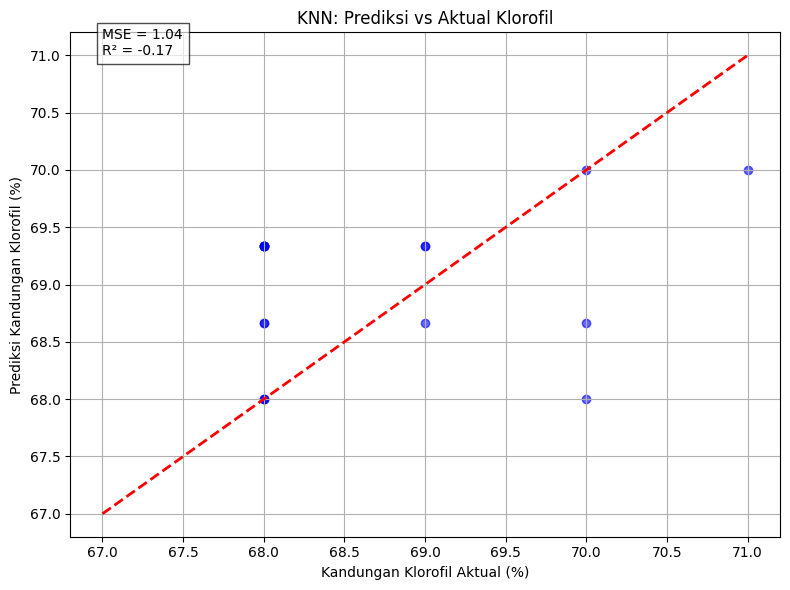

In [6]:
# 9. Visualisasi hasil
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Kandungan Klorofil Aktual (%)")
plt.ylabel("Prediksi Kandungan Klorofil (%)")
plt.title("KNN: Prediksi vs Aktual Klorofil")
plt.text(y.min(), y.max(), f"MSE = {mse:.2f}\nR² = {r2:.2f}", fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7))
plt.grid(True)
plt.tight_layout()
plt.show()